<a href="https://colab.research.google.com/github/meera998/Netflix_DataAnalysis/blob/main/Netflix_DAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A surface analysis of Netflix's Dataset

Through this project, we will be analyzing the [Netflix Movies and TV Shows ](http://https://www.kaggle.com/datasets/shivamb/netflix-shows) dataset to identify: 

* **A snapshot:**
> * Distribution of types of movies and series </br>
> * Distribution of genres </br>
> * Distribution of maturity ratings </br>
> * Movies/series added per month per year </br>
> * Top performing directors</br>
* **Countries with highest number of movie/series production**
* **The top 5 actors by the number of times they performed in a movies/series**
* **What are the top genres in each country?**
* **List of the movies that have "happy" in their descriptions**
* **Top three genres by their accumulated durations**
* **Which movies has the longest duration**
* **List 5 longest movies and series**
* **Which series has the highest number of seasons**
* **Count the number of movies and TV series for each year**
* **Which movies has the longest duration**
* **List 3 movies and TV series which have the highest number of cast**
* **Show the total number of ,movies and TV series in each country**
* **Count the movies which relate to magic,animal,history,games and marin**







### importing libraries 

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

### importing CSV file

In [11]:
NT_df=pd.read_csv("https://raw.githubusercontent.com/meera998/Netflix_DataAnalysis/main/Source_Code/netflix_titles.csv")

In [12]:
NT_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

##First of all we will be working on ***data cleaning*** so we can have an accurate Data Analysis

###1. Handling duplicated data 

In [13]:
#here we show all the duplicated data regarding 'description', to examine how to deal with it. 
#duplicated_data= NT_df.loc[NT_df.duplicated(subset=["description","type"], keep=False), :]
#duplicated_data.sort_values("description", ascending=True, inplace=True)

#first we change all the empty data to NaN
NT_df = NT_df.replace("", np.nan)

#then we sort the data based on the added_date to keep the latest record 
NT_df.sort_values("date_added", ascending=True, inplace=True)
NT_df.drop_duplicates(subset=["description"], keep="last", inplace=True)
NT_clean= NT_df.sort_values(by=["description"], ascending=True)

### 2. Handling null values

In [14]:
#here we figure out how many null values we have for each observations 
NT_df.isnull().sum()

show_id            0
type               0
title              0
director        2628
cast             822
country          822
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

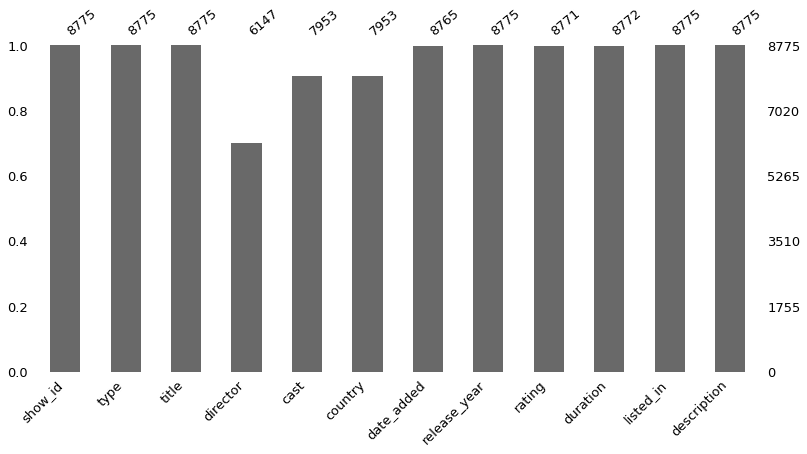

In [15]:
#we use bar chart to visulaize and understand the null values for each observations 
msno.bar(NT_clean, figsize=(13,6), fontsize=13);
plt.xticks(rotation=40);

as we can see above most of the missing values fall under **director, cast** and **country** columns.

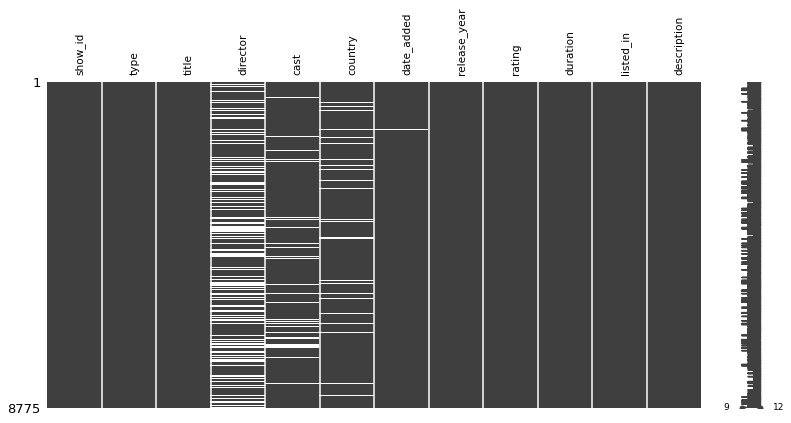

In [16]:
#The below graph give us positional information of the missing values, and how the missing values are disrtibuted over the dataset
msno.matrix(NT_clean, figsize=(13,6), fontsize=10.5);
plt.xticks(rotation=90);

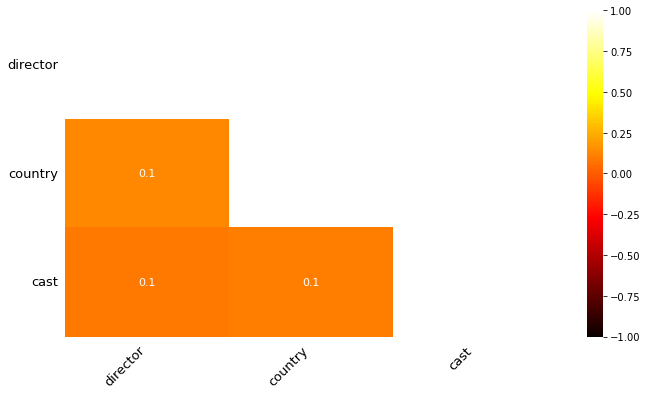

In [17]:
# the below heatmap reveals that how the missing data are related 
msno.heatmap(NT_clean[["director","country","cast"]], figsize=(11,6), fontsize=13, cmap="hot");

the above heatmap shows how the missing values are realted, as we can see the values are Missing Completely at Random (**MCAR**) which means there is not any correlation between the values. Therefore, based on these hypothesis we will fill the missing values as bellow:


*   changing the values in **director**, **country** and **cast** to *UNKNOWN*.
*   sorting the generes and filling these **rating** null values with either the previous record or the next record.
*filling **duration** and **date_added** by taking median.



In [18]:
#the duration has been entered incorrectly in place of rating, therefore, before dealing with null values we will fix this problem
null_values=NT_df.loc[NT_df.duration.isnull(), :] 
null_values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [19]:
NT_df.at[5541,"rating"]= np.nan
NT_df.at[5541,"duration"]= "74 min"
NT_df.at[5794,"rating"]= np.nan
NT_df.at[5794,"duration"]= "84 min"
NT_df.at[5813,"rating"]= np.nan
NT_df.at[5813,"duration"]= "66 min"

as we can observe above we swaped the values for **rating** and **duration** so we can later on fill the null values proparly without any mistakes

In [20]:
'''here we replace all the null values in country, director, cast and date_added to unknown because 
all of them are independable '''
NT_clean.director.replace(np.nan, "UNKNOWN", inplace=True)
NT_clean.country.replace(np.nan, "UNKNOWN", inplace=True)
NT_clean.cast.replace(np.nan, "UNKNOWN", inplace=True)

# for the rating we first sort the generes, and then use ffill method to fill the bull values
NT_clean=NT_clean.sort_values(by=["listed_in"], ascending=True)
NT_clean["rating"].fillna(method="ffill", inplace=True)

# for the date_added we specify the median, but we should first convert date_added which is string to date time
NT_clean["date_added"]= pd.to_datetime(NT_clean['date_added'])
NT_clean["date_added"].fillna(NT_clean["date_added"].mode()[0], inplace=True)

# for the duration also we will use median to fill the null values 
NT_clean["duration"].fillna(NT_clean["duration"].mode()[0], inplace=True)

In [31]:
#checking wether null values are remaning or not
NT_clean.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now as we can see we our work with dealing with null values